### Import the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### Read the csv into a dataframe

In [2]:
car_price=pd.read_csv('CarPrice_Assignment.csv')
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Analyse the dataframe using info and describe methods

In [3]:
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### As the info of the dataframe shows that there are no null values, so null value treatment is not required
#### Change the data types as below
- convert symboling into char, as these are categorical variable
- set car_ID as index of the dataframe
    

In [5]:
conv_dict={'car_ID':object,'symboling':object}
car_price=car_price.astype(conv_dict)

In [6]:
car_price.set_index('car_ID',inplace=True)

#### Seperating the Company name with car model


In [7]:
# Create a temporary dataframe splitting the CarName into Company Name and Car model
temp=car_price.CarName.str.split(expand=True)
temp=temp.drop([2,3,4],axis=True)
temp.columns = ['Manufacturer','Model']
temp.head()

,Manufacturer,Model
car_ID,,
1,alfa-romero,giulia
2,alfa-romero,stelvio
3,alfa-romero,Quadrifoglio
4,audi,100
5,audi,100ls


In [8]:
## Merge this temp dataframe into original frame based on car_ID and drop Model and CarName columns as not required
car_price=pd.concat([car_price,temp], axis=1, ignore_index=False,sort=False)
car_price=car_price.drop(['CarName','Model'],axis=1)

In [9]:
car_price.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Manufacturer
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [10]:
# Check Distinct Values in column Manufacturer
car_price.Manufacturer.value_counts().sort_values()

toyouta         1
mercury         1
Nissan          1
porcshce        1
vokswagen       1
vw              2
maxda           2
renault         2
chevrolet       3
alfa-romero     3
jaguar          3
isuzu           4
porsche         4
saab            6
plymouth        7
audi            7
buick           8
bmw             8
dodge           9
volkswagen      9
peugeot        11
volvo          11
subaru         12
honda          13
mitsubishi     13
mazda          15
nissan         17
toyota         31
Name: Manufacturer, dtype: int64

In [11]:
# Update the incorrect column values of the Manufacturer column
car_price.loc[car_price['Manufacturer'] == 'toyouta','Manufacturer' ] = 'toyota'
car_price.loc[car_price['Manufacturer'] == 'Nissan','Manufacturer' ] = 'nissan'
car_price.loc[car_price['Manufacturer'] == 'vokswagen','Manufacturer' ] = 'volkswagen'
car_price.loc[car_price['Manufacturer'] == 'porcshce','Manufacturer' ] = 'porsche'
car_price.loc[car_price['Manufacturer'] == 'maxda','Manufacturer' ] = 'mazda'
car_price.loc[car_price['Manufacturer'] == 'vw','Manufacturer' ] = 'volkswagen'
car_price.Manufacturer.value_counts().sort_values()

mercury         1
renault         2
chevrolet       3
jaguar          3
alfa-romero     3
isuzu           4
porsche         5
saab            6
audi            7
plymouth        7
buick           8
bmw             8
dodge           9
volvo          11
peugeot        11
volkswagen     12
subaru         12
mitsubishi     13
honda          13
mazda          17
nissan         18
toyota         32
Name: Manufacturer, dtype: int64

### Now let'sfirst figure out if we can apply the linear regression model on the given dataset or not
- Check if the dependent varaible and independent variables follow some linear pattern
- Check for the multicolinearity, ie. the how much the non independent variables are correlated to each other

### Plot the scatterplot of the dependent varaible(Price) with all other numeric(intiger) indipendent variables

In [12]:
# Get the list of the variables having int data type
data_types = car_price.columns.to_series().groupby(car_price.dtypes).groups
#print(data_types)
int_var=[]
for i in data_types.keys():
    if i=='int64':
        int_var.append(data_types[i])
int_var=list(int_var[0])

float_var=[]
for i in data_types.keys():
    if i=='float64':
        float_var.append(data_types[i])
float_var=list(float_var[0])

curbweight


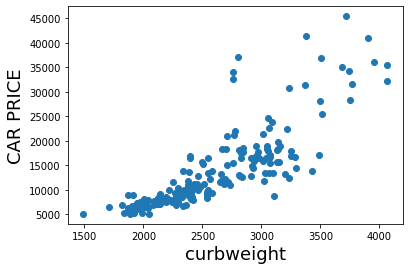

enginesize


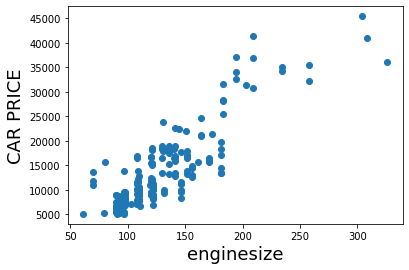

horsepower


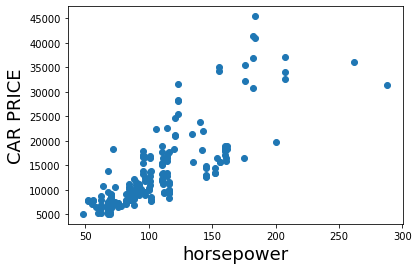

peakrpm


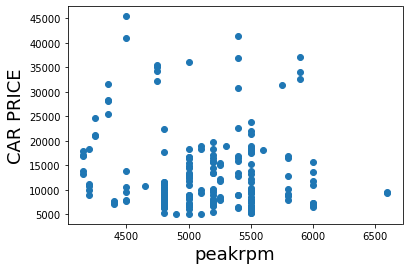

citympg


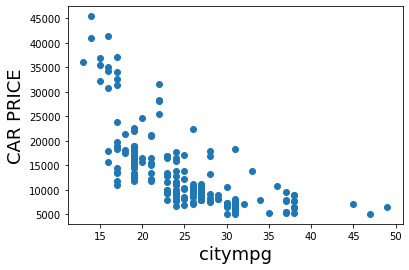

highwaympg


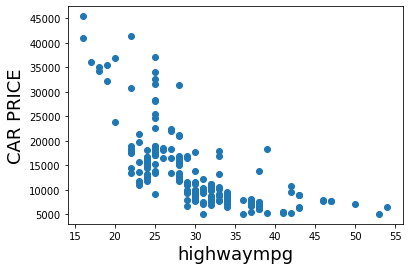

In [13]:
for i in int_var:
    print (i)
    plt.scatter(car_price[i],car_price['price'])
    plt.xlabel(i,fontsize=18)
    plt.ylabel('CAR PRICE',fontsize=18)
    plt.show()

### Plot the scatterplot of the dependent varaible(Price) with all other numeric(Float) indipendent variables

wheelbase


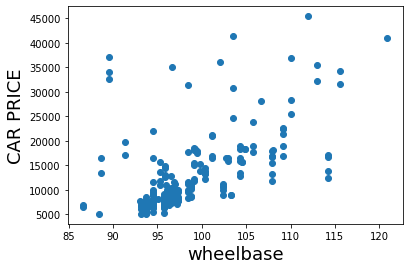

carlength


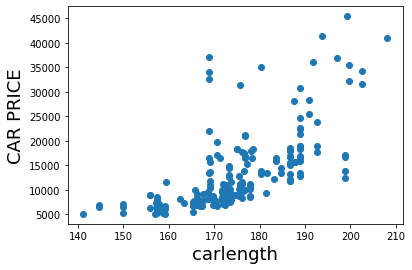

carwidth


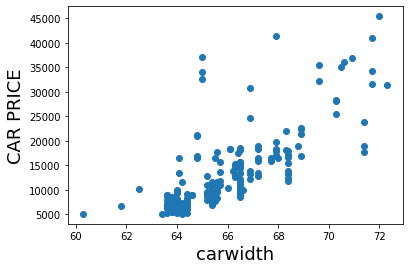

carheight


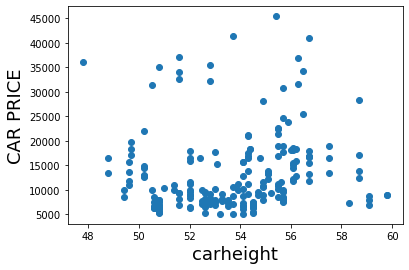

boreratio


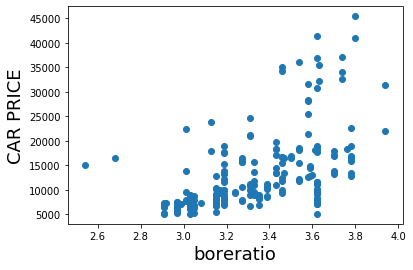

stroke


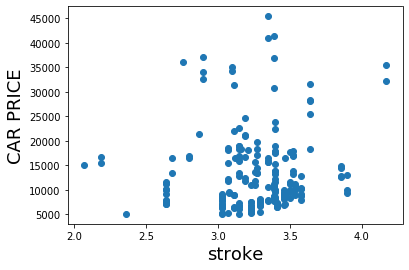

compressionratio


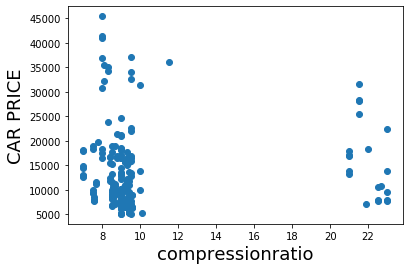

price


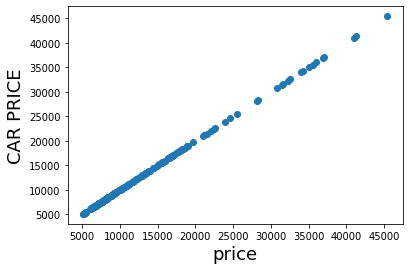

In [14]:
for i in float_var:
    print (i)
    plt.scatter(car_price[i],car_price['price'])
    plt.xlabel(i,fontsize=18)
    plt.ylabel('CAR PRICE',fontsize=18)
    plt.show()

### Now let's visualise the Categorical data by plotting the box plot

In [15]:
### Fetch the list of the categorical Variables
cat_var=[]
for i in data_types.keys():
    if i=='object':
        cat_var.append(data_types[i])
cat_var=list(cat_var[0])
print(cat_var)
temp=cat_var[1:12]
temp.append(cat_var[0])
cat_var=temp
print(temp)

['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'Manufacturer']
['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'Manufacturer', 'symboling']


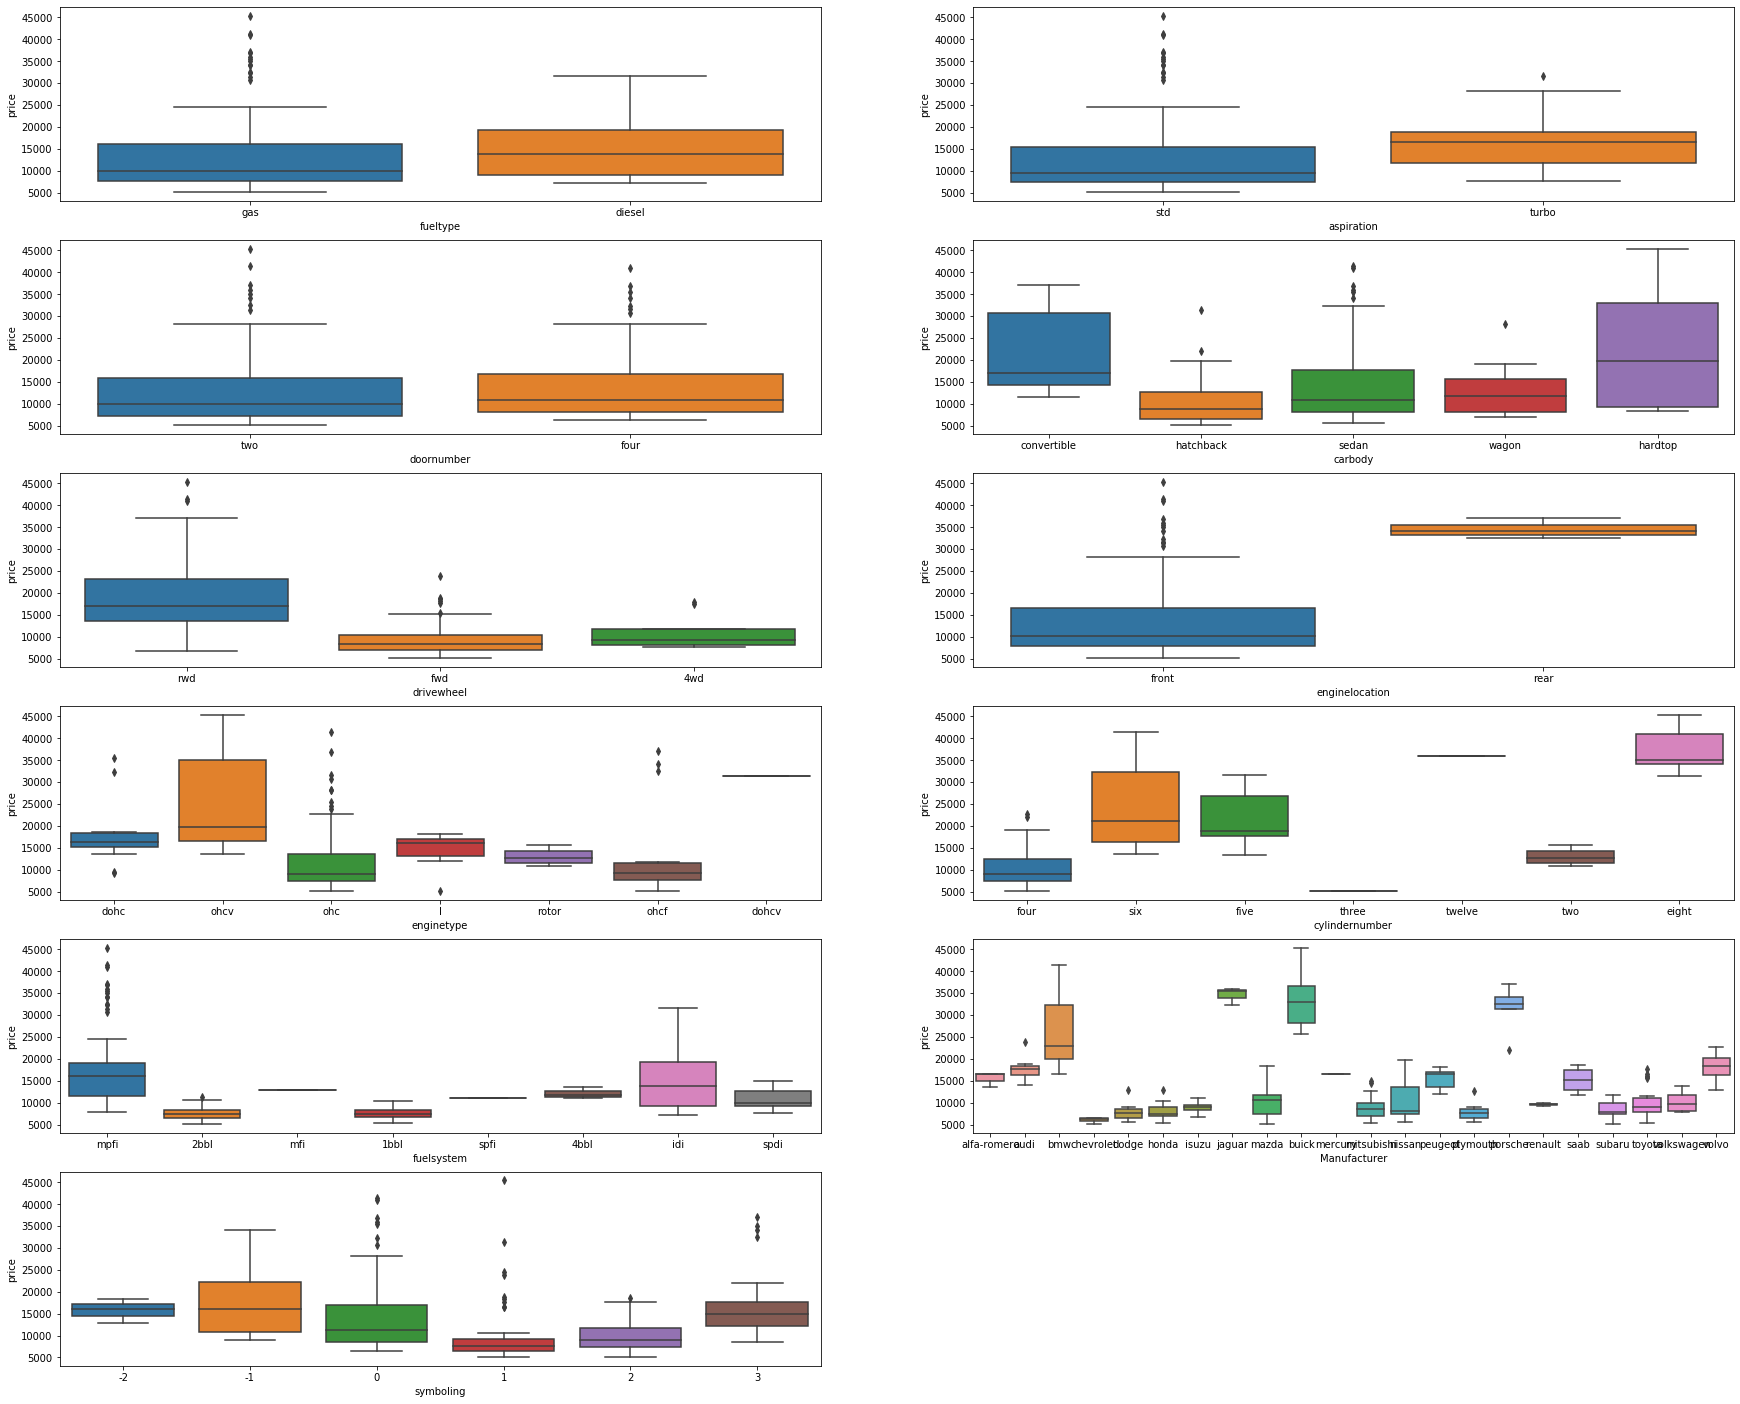

In [16]:
### Plot the box plot between Price and independent categorical variables
plt.figure(figsize=(30,25))
for i,j in zip(cat_var,range(1,12)):
    plt.subplot(6,2,j)
    sns.boxplot(x=i,y='price', data = car_price)
    

## Data Preperation
- Convert Binary ctegorical variables to 0/1
- Convert other categorical variables to dummy variables

In [17]:
## Check how many unique values each categorical variable have
for i in cat_var:
    print(car_price[i].value_counts().sort_values())
#car_price.Manufacturer.value_counts().sort_values()

diesel     20
gas       185
Name: fueltype, dtype: int64
turbo     37
std      168
Name: aspiration, dtype: int64
two      90
four    115
Name: doornumber, dtype: int64
convertible     6
hardtop         8
wagon          25
hatchback      70
sedan          96
Name: carbody, dtype: int64
4wd      9
rwd     76
fwd    120
Name: drivewheel, dtype: int64
rear       3
front    202
Name: enginelocation, dtype: int64
dohcv      1
rotor      4
dohc      12
l         12
ohcv      13
ohcf      15
ohc      148
Name: enginetype, dtype: int64
three       1
twelve      1
two         4
eight       5
five       11
six        24
four      159
Name: cylindernumber, dtype: int64
mfi      1
spfi     1
4bbl     3
spdi     9
1bbl    11
idi     20
2bbl    66
mpfi    94
Name: fuelsystem, dtype: int64
mercury         1
renault         2
chevrolet       3
jaguar          3
alfa-romero     3
isuzu           4
porsche         5
saab            6
audi            7
plymouth        7
buick           8
bmw             

#### So we can see that there are below binary categorical variables, whose encoding we will do as follows
- fueltype        : diesel=0,     gas=1
- aspiration      : turbo=0,      std=1
- doornumber      : two =0,       four=1
- enginelocation  : rear=0,       front=1

In [18]:
car_price.loc[car_price['fueltype'] == 'diesel','fueltype' ] = 0
car_price.loc[car_price['fueltype'] == 'gas','fueltype' ] = 1
car_price.loc[car_price['aspiration'] == 'turbo','aspiration' ] = 0
car_price.loc[car_price['aspiration'] == 'std','aspiration' ] = 1
car_price.loc[car_price['doornumber'] == 'two','doornumber' ] = 0
car_price.loc[car_price['doornumber'] == 'four','doornumber' ] = 1
car_price.loc[car_price['enginelocation'] == 'rear','enginelocation' ] = 0
car_price.loc[car_price['enginelocation'] == 'front','enginelocation' ] = 1

In [19]:
## Create a function to convert the dummy variables
def conv_dumm(x,y):
    x_df=pd.get_dummies(y[x],drop_first=True)
    temp = pd.concat([y,x_df],axis=1)
    temp=temp.drop(x,axis=1)
    return(temp)
    #return(y)

In [20]:
## Convert categorical variables to dummy variable 
car_price=conv_dumm('carbody',car_price)
car_price=conv_dumm('drivewheel',car_price)
car_price=conv_dumm('enginetype',car_price)
car_price=conv_dumm('cylindernumber',car_price)
car_price=conv_dumm('fuelsystem',car_price)
car_price=conv_dumm('Manufacturer',car_price)
car_price=conv_dumm('symboling',car_price)


In [21]:
car_price.columns

Index([        'fueltype',       'aspiration',       'doornumber',
         'enginelocation',        'wheelbase',        'carlength',
               'carwidth',        'carheight',       'curbweight',
             'enginesize',        'boreratio',           'stroke',
       'compressionratio',       'horsepower',          'peakrpm',
                'citympg',       'highwaympg',            'price',
                'hardtop',        'hatchback',            'sedan',
                  'wagon',              'fwd',              'rwd',
                  'dohcv',                'l',              'ohc',
                   'ohcf',             'ohcv',            'rotor',
                   'five',             'four',              'six',
                  'three',           'twelve',              'two',
                   '2bbl',             '4bbl',              'idi',
                    'mfi',             'mpfi',             'spdi',
                   'spfi',             'audi',              'b

In [22]:
## Create a temporary dataframe having just the numerical variables and the dummy variable
#car_price_temp=car_price.drop(['symboling','CarName','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','Manufacturer','Model'],axis=1)

In [23]:
#car_price_temp.columns

### Split this data into train-test

In [24]:
np.random.seed(0)
df_train,df_test=train_test_split(car_price,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(143, 69)
(62, 69)


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 123 to 9
Data columns (total 69 columns):
fueltype            143 non-null int64
aspiration          143 non-null int64
doornumber          143 non-null int64
enginelocation      143 non-null int64
wheelbase           143 non-null float64
carlength           143 non-null float64
carwidth            143 non-null float64
carheight           143 non-null float64
curbweight          143 non-null int64
enginesize          143 non-null int64
boreratio           143 non-null float64
stroke              143 non-null float64
compressionratio    143 non-null float64
horsepower          143 non-null int64
peakrpm             143 non-null int64
citympg             143 non-null int64
highwaympg          143 non-null int64
price               143 non-null float64
hardtop             143 non-null uint8
hatchback           143 non-null uint8
sedan               143 non-null uint8
wagon               143 non-null uint8
fwd                 1

### Scale the numeric variables

In [26]:
num_var=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

In [27]:
## Intantiate the scalar object
scaler=MinMaxScaler()
## Fit on data
df_train[num_var]=scaler.fit_transform(df_train[num_var])

In [28]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,saab,subaru,toyota,volkswagen,volvo,-1,0,1,2,3
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.559441,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,...,0.020979,0.076923,0.139860,0.048951,0.041958,0.090909,0.349650,0.300699,0.118881,0.125874
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,...,0.143818,0.267406,0.348061,0.216524,0.201198,0.288490,0.478536,0.460174,0.324786,0.332873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Get the X_train and y_train

In [29]:
y_train=df_train.pop('price')
X_train=df_train

In [30]:
y_train.head()

car_ID
123     7609.0
126    22018.0
167     9538.0
2      16500.0
200    18950.0
Name: price, dtype: float64

### Since there huge number of Predective variables, so let's use RFE to select top 20 variables

In [31]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,20)
rfe=rfe.fit(X_train,y_train)

In [32]:
#list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [33]:
## Columns which RFE chosen for model building
cols=X_train.columns[rfe.support_]
cols

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'peakrpm', 'dohcv', 'l', 'rotor', 'five',
       'four', 'three', 'twelve', 'two', 'bmw', 'mitsubishi', 'peugeot',
       'porsche'],
      dtype='object')

In [34]:
## Columns which RFE rejected for model building
#cols_rej=X_train.columns[~rfe.support_]
#cols_rej

### Now lets take the variables suggested by RFE and use the stats model for detailed stats 

In [35]:
# Create a data frame with variables, what RFE has suggested
X_train_rfe = X_train[cols]
X_train_rfe.columns

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'peakrpm', 'dohcv', 'l', 'rotor', 'five',
       'four', 'three', 'twelve', 'two', 'bmw', 'mitsubishi', 'peugeot',
       'porsche'],
      dtype='object')

In [36]:
## Add a constant 
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,enginelocation,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,dohcv,...,rotor,five,four,three,twelve,two,bmw,mitsubishi,peugeot,porsche
car_ID,,,,,,,,,,,,,,,,,,,,,
123,1.0,1,0.291667,0.272692,0.139623,0.230159,0.525253,0.083333,0.551020,0,...,0,0,1,0,0,0,0,0,0,0
126,1.0,1,0.666667,0.500388,0.339623,1.000000,0.464646,0.395833,0.551020,0,...,0,0,1,0,0,0,0,0,0,1
167,1.0,1,0.308333,0.314973,0.139623,0.444444,0.449495,0.266667,1.000000,0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,1,0.316667,0.411171,0.260377,0.626984,0.247475,0.262500,0.346939,0,...,0,0,1,0,0,0,0,0,0,0
200,1.0,1,0.575000,0.647401,0.260377,0.746032,0.484848,0.475000,0.387755,0,...,0,0,1,0,0,0,0,0,0,0


In [37]:
## Run the stats model to fit on data
lm=sm.OLS(y_train,X_train_rfe).fit()

In [38]:
## See the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     118.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.74e-69
Time:                        20:34:18   Log-Likelihood:                -1276.4
No. Observations:                 143   AIC:                             2591.
Df Residuals:                     124   BIC:                             2647.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6149.9666   3062.785      2.

In [39]:
##Calculate the VIF of all the predictors
temp=X_train_rfe.drop('const',axis=1)
VIF = pd.DataFrame()
VIF['Features']=temp.columns
VIF['VIF']=[variance_inflation_factor(temp.values, i) for i in range (temp.shape[1])]
VIF['VIF']=round(VIF['VIF'],2)
VIF=VIF.sort_values(by='VIF',ascending=False)
VIF

,Features,VIF
10,rotor,inf
9,l,inf
18,peugeot,inf
15,two,inf
13,three,inf
3,enginesize,90.24
0,enginelocation,74.30
2,curbweight,61.82
12,four,57.64
1,carwidth,45.04


In [40]:
## Create a function to remove a column and run the stats model on new dataframe
## Function returns new model and updated dataframe
def reit_lm(df,col):
    df=df.drop(col,axis=1)
    lm=sm.OLS(y_train,df).fit()
    print(lm.summary())
    return(df,lm)

In [41]:
##Create a function to Calculate the VIF of all the predictors
def VIF_calc(df):
    temp=df.drop('const',axis=1)
    VIF = pd.DataFrame()
    VIF['Features']=temp.columns
    VIF['VIF']=[variance_inflation_factor(temp.values, i) for i in range (temp.shape[1])]
    VIF['VIF']=round(VIF['VIF'],2)
    VIF=VIF.sort_values(by='VIF',ascending=False)
    print(VIF)

#### We can see the p-value for "dohcv" is high (>0.05), so let's drop it and reiterate the model

In [42]:
X_train_rfe,lm=reit_lm(X_train_rfe,'dohcv')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     126.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.29e-70
Time:                        20:34:31   Log-Likelihood:                -1276.4
No. Observations:                 143   AIC:                             2589.
Df Residuals:                     125   BIC:                             2642.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5993.8700   2781.567      2.

In [43]:
VIF_calc(X_train_rfe)

          Features    VIF
9            rotor    inf
8                l    inf
17         peugeot    inf
14             two    inf
12           three    inf
3       enginesize  85.27
0   enginelocation  70.03
2       curbweight  59.97
11            four  56.38
1         carwidth  42.78
4        boreratio  42.65
5           stroke  31.62
6       horsepower  24.55
7          peakrpm  10.08
13          twelve   3.21
10            five   3.20
18         porsche   1.93
15             bmw   1.35
16      mitsubishi   1.24


#### We can see that column "peakrpm" is having high p-value, let's drop it

In [44]:
X_train_rfe,lm=reit_lm(X_train_rfe,'peakrpm')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.41e-71
Time:                        20:34:36   Log-Likelihood:                -1276.9
No. Observations:                 143   AIC:                             2588.
Df Residuals:                     126   BIC:                             2638.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6680.5269   2688.362      2.

In [45]:
VIF_calc(X_train_rfe)

          Features    VIF
16         peugeot    inf
7                l    inf
8            rotor    inf
11           three    inf
13             two    inf
3       enginesize  85.27
0   enginelocation  66.62
2       curbweight  57.83
10            four  52.87
1         carwidth  42.69
4        boreratio  38.98
5           stroke  31.51
6       horsepower  16.86
12          twelve   3.14
9             five   3.06
17         porsche   1.91
14             bmw   1.35
15      mitsubishi   1.24


#### As we can see there is no change in R-Squared. Also now thep-value of column "peugeot" is very high, so, let's drop it

In [46]:
X_train_rfe,lm=reit_lm(X_train_rfe,'peugeot')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.41e-71
Time:                        20:34:41   Log-Likelihood:                -1276.9
No. Observations:                 143   AIC:                             2588.
Df Residuals:                     126   BIC:                             2638.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6680.5269   2688.362      2.

In [47]:
VIF_calc(X_train_rfe)

          Features    VIF
8            rotor    inf
13             two    inf
3       enginesize  85.27
0   enginelocation  66.62
2       curbweight  57.83
10            four  52.87
1         carwidth  42.69
4        boreratio  38.98
5           stroke  31.51
6       horsepower  16.86
12          twelve   3.14
9             five   3.06
11           three   2.22
7                l   2.10
16         porsche   1.91
14             bmw   1.35
15      mitsubishi   1.24


#### VIF for column "rotor" is way too high, let's drop it

In [48]:
X_train_rfe,lm=reit_lm(X_train_rfe,'rotor')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.41e-71
Time:                        20:34:48   Log-Likelihood:                -1276.9
No. Observations:                 143   AIC:                             2588.
Df Residuals:                     126   BIC:                             2638.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6680.5269   2688.362      2.

In [49]:
VIF_calc(X_train_rfe)

          Features    VIF
3       enginesize  85.27
0   enginelocation  66.62
2       curbweight  57.83
9             four  52.87
1         carwidth  42.69
4        boreratio  38.98
5           stroke  31.51
6       horsepower  16.86
12             two   5.18
11          twelve   3.14
8             five   3.06
10           three   2.22
7                l   2.10
15         porsche   1.91
13             bmw   1.35
14      mitsubishi   1.24


#### VIF of column "enginesize" is way to high, let's drop it

In [50]:
X_train_rfe,lm=reit_lm(X_train_rfe,'enginesize')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     90.54
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.50e-60
Time:                        20:35:33   Log-Likelihood:                -1308.3
No. Observations:                 143   AIC:                             2649.
Df Residuals:                     127   BIC:                             2696.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.392e+04   3153.922      4.

In [51]:
VIF_calc(X_train_rfe)

          Features    VIF
0   enginelocation  60.11
2       curbweight  45.71
1         carwidth  42.69
8             four  26.94
3        boreratio  23.77
4           stroke  17.98
5       horsepower  16.85
6                l   2.02
9            three   2.00
7             five   1.93
14         porsche   1.88
11             two   1.75
10          twelve   1.37
12             bmw   1.35
13      mitsubishi   1.24


#### p-value for "five"  is too high, let's drop it

In [52]:
X_train_rfe,lm=reit_lm(X_train_rfe,'five')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     97.75
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.50e-61
Time:                        20:35:50   Log-Likelihood:                -1308.3
No. Observations:                 143   AIC:                             2647.
Df Residuals:                     128   BIC:                             2691.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.398e+04   3111.998      4.

In [53]:
VIF_calc(X_train_rfe)

          Features    VIF
0   enginelocation  56.80
2       curbweight  44.74
1         carwidth  39.42
3        boreratio  23.50
7             four  21.64
4           stroke  17.80
5       horsepower  15.14
6                l   2.02
8            three   1.97
13         porsche   1.88
10             two   1.59
9           twelve   1.37
11             bmw   1.28
12      mitsubishi   1.23


#### p-value of column "stroke" is high,let's drop it

In [54]:
X_train_rfe,lm=reit_lm(X_train_rfe,'stroke')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     106.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.55e-62
Time:                        20:36:07   Log-Likelihood:                -1308.3
No. Observations:                 143   AIC:                             2645.
Df Residuals:                     129   BIC:                             2686.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.375e+04   3035.859      4.

In [55]:
VIF_calc(X_train_rfe)

          Features    VIF
0   enginelocation  51.86
2       curbweight  41.55
1         carwidth  38.29
6             four  20.52
3        boreratio  19.43
4       horsepower  15.09
5                l   1.96
7            three   1.92
12         porsche   1.87
9              two   1.54
10             bmw   1.28
8           twelve   1.27
11      mitsubishi   1.19


#### p-value of column "four" is high, let's drop it

In [56]:
X_train_rfe,lm=reit_lm(X_train_rfe,'four')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     115.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.11e-63
Time:                        20:36:23   Log-Likelihood:                -1308.6
No. Observations:                 143   AIC:                             2643.
Df Residuals:                     130   BIC:                             2682.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.406e+04   2997.458      4.

In [57]:
VIF_calc(X_train_rfe)

          Features    VIF
2       curbweight  36.76
1         carwidth  34.98
4       horsepower  13.03
3        boreratio  12.82
0   enginelocation  11.91
11         porsche   1.80
5                l   1.63
6            three   1.29
7           twelve   1.22
9              bmw   1.15
10      mitsubishi   1.11
8              two   1.06


#### p-valueof column "two" is high,let's drop it

In [58]:
X_train_rfe,lm=reit_lm(X_train_rfe,'two')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     125.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.15e-64
Time:                        20:36:33   Log-Likelihood:                -1309.4
No. Observations:                 143   AIC:                             2643.
Df Residuals:                     131   BIC:                             2678.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.411e+04   3001.649      4.

In [59]:
VIF_calc(X_train_rfe)

          Features    VIF
2       curbweight  36.08
1         carwidth  34.92
4       horsepower  12.76
3        boreratio  12.75
0   enginelocation  11.90
10         porsche   1.78
5                l   1.63
6            three   1.29
7           twelve   1.22
8              bmw   1.14
9       mitsubishi   1.11


#### p-value of "horsepower" is high, let's drop it

In [60]:
X_train_rfe,lm=reit_lm(X_train_rfe,'horsepower')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     136.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.86e-64
Time:                        20:36:41   Log-Likelihood:                -1310.6
No. Observations:                 143   AIC:                             2643.
Df Residuals:                     132   BIC:                             2676.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.421e+04   3015.776      4.

In [61]:
VIF_calc(X_train_rfe)

         Features    VIF
1        carwidth  34.89
2      curbweight  25.03
3       boreratio  12.75
0  enginelocation  11.83
4               l   1.39
9         porsche   1.33
5           three   1.26
7             bmw   1.12
6          twelve   1.08
8      mitsubishi   1.08


#### p-value of all the variables are below 0.05 whereas the VIF of "carwidth" is high,let's drop it

In [62]:
X_train_rfe,lm=reit_lm(X_train_rfe,'carwidth')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     121.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.02e-59
Time:                        20:36:51   Log-Likelihood:                -1325.2
No. Observations:                 143   AIC:                             2670.
Df Residuals:                     133   BIC:                             2700.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.165e+04   3285.672      3.

In [63]:
VIF_calc(X_train_rfe)

         Features    VIF
2       boreratio  12.75
1      curbweight   8.93
0  enginelocation   8.23
3               l   1.39
8         porsche   1.27
4           three   1.23
6             bmw   1.10
5          twelve   1.08
7      mitsubishi   1.08


#### p-value and VIF of boreratio is high, let's drop it

In [64]:
X_train_rfe,lm=reit_lm(X_train_rfe,'boreratio')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     134.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.26e-60
Time:                        20:37:03   Log-Likelihood:                -1326.9
No. Observations:                 143   AIC:                             2672.
Df Residuals:                     134   BIC:                             2699.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.119e+04   3303.822      3.

In [65]:
VIF_calc(X_train_rfe)

         Features   VIF
1      curbweight  6.08
0  enginelocation  5.33
2               l  1.36
3           three  1.22
5             bmw  1.10
4          twelve  1.08
6      mitsubishi  1.08
7         porsche  1.07


#### p-value of mitsubishi  is increased to 0.06, let's drop it

In [66]:
X_train_rfe,lm=reit_lm(X_train_rfe,'mitsubishi')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.97e-60
Time:                        20:37:19   Log-Likelihood:                -1328.8
No. Observations:                 143   AIC:                             2674.
Df Residuals:                     135   BIC:                             2697.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.104e+04   3334.601      3.

In [67]:
VIF_calc(X_train_rfe)

         Features   VIF
1      curbweight  6.07
0  enginelocation  5.18
2               l  1.36
3           three  1.22
5             bmw  1.10
4          twelve  1.08
6         porsche  1.07


#### VIF of curbweight is high, let's drop it

In [68]:
X_train_rfe,lm=reit_lm(X_train_rfe,'curbweight')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     10.95
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.22e-10
Time:                        20:37:28   Log-Likelihood:                -1455.9
No. Observations:                 143   AIC:                             2926.
Df Residuals:                     136   BIC:                             2947.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.904e+04   8044.078      2.

In [69]:
VIF_calc(X_train_rfe)

         Features   VIF
1               l  1.20
0  enginelocation  1.14
2           three  1.12
4             bmw  1.05
3          twelve  1.01
5         porsche  1.01


#### As soon we dropped the curbweight column, the R-squared value dropped drastically from 0.886 to 0.326, so we should not drop it rather drop enginelocation variable, the next highest VIF value varaible

In [70]:
## Add curbweight column again to the dataframe
X_train_rfe=pd.concat([X_train_rfe,X_train['curbweight']],axis = 1,ignore_index=False)
X_train_rfe.head()

,const,enginelocation,l,three,twelve,bmw,porsche,curbweight
car_ID,,,,,,,,
123,1.0,1,0,0,0,0,0,0.272692
126,1.0,1,0,0,0,0,1,0.500388
167,1.0,1,0,0,0,0,0,0.314973
2,1.0,1,0,0,0,0,0,0.411171
200,1.0,1,0,0,0,0,0,0.647401


#### now drop enginelocation and see the effect

In [71]:
X_train_rfe,lm=reit_lm(X_train_rfe,'enginelocation')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     160.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.36e-59
Time:                        20:38:01   Log-Likelihood:                -1334.6
No. Observations:                 143   AIC:                             2683.
Df Residuals:                     136   BIC:                             2704.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.4352    539.018     -0.107      0.9

In [72]:
VIF_calc(X_train_rfe)

     Features   VIF
5  curbweight  1.33
0           l  1.31
1       three  1.15
3         bmw  1.09
2      twelve  1.04
4     porsche  1.04


### We can say that we have got our first model (lm) as all the variables are significant as the p-value is low for all of them, VIF is also very small and R-Squared is 0.876


In [73]:
X_train_rfe.head()

,const,l,three,twelve,bmw,porsche,curbweight
car_ID,,,,,,,
123,1.0,0,0,0,0,0,0.272692
126,1.0,0,0,0,0,1,0.500388
167,1.0,0,0,0,0,0,0.314973
2,1.0,0,0,0,0,0,0.411171
200,1.0,0,0,0,0,0,0.647401


#### Now let's drop some variables whose p-value is below 0.05 but still high as compared to others as "twelve" and see the effect

In [74]:
temp_1,lm_1=reit_lm(X_train_rfe,'twelve')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     187.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.26e-59
Time:                        20:38:31   Log-Likelihood:                -1337.0
No. Observations:                 143   AIC:                             2686.
Df Residuals:                     137   BIC:                             2704.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -267.7395    537.075     -0.499      0.6

In [75]:
VIF_calc(temp_1)

     Features   VIF
0           l  1.30
4  curbweight  1.28
1       three  1.14
2         bmw  1.08
3     porsche  1.04


#### Not much change in r-squared, (0.872 from 0.876) and p-value is almost 0 for all the varaibles, so this can be our another model

### We can now say that we have another model now (lm_1) with R-Squared value of 0.872, which is almost similar to that of lm(0.876)

In [76]:
temp_1.head()

,const,l,three,bmw,porsche,curbweight
car_ID,,,,,,
123,1.0,0,0,0,0,0.272692
126,1.0,0,0,0,1,0.500388
167,1.0,0,0,0,0,0.314973
2,1.0,0,0,0,0,0.411171
200,1.0,0,0,0,0,0.647401


#### From the scatter plot we can see that enginesize,horsepower,citympg,highwaympg are also effecting the price, whereas tese are missing from our final model, let's add these variables one by one and analyse it
#### Let's first add enginesize

In [77]:
temp=pd.concat([X_train_rfe,X_train['enginesize']],axis = 1,ignore_index=False)
lm_new=sm.OLS(y_train,temp).fit()
lm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     146.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.90e-60
Time:                        20:39:11   Log-Likelihood:                -1330.2
No. Observations:                 143   AIC:                             2676.
Df Residuals:                     135   BIC:                             2700.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.6366    526.521      0.149      0.881    -962.660    1119.934
l          -4197.0586   1150.231     -3.649      0.000   -6471.862   -1922.255
three       9269.4220   3051.060      3.038      0.003    3235.365    1.53e+04
twelve      1466.7095   3266.675      0.449      0.654   -4993.769    7927.188
bmw         8248.2298   1195.230      6.901      0.000    5884.432    1.06e+04
porsche     9979.5098   1675.019      5.958      0.000    6666.837    1.33e+04
curbweight  2.422e+04   2674.403      9.055      0.000    1.89e+04    2.95e+04
enginesize  1.133e+04   3853.272      2.940      0.004    3707.330    1.89e+04
==============================================================================
Omnibus:                        5.640   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                7.873
Skew:                           0.144   Prob(JB):                       0.0195
Kurtosis:                       4.113   Cond. No.                         24.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
VIF_calc(temp)

     Features    VIF
6  enginesize  23.20
5  curbweight  22.19
0           l   1.52
2      twelve   1.41
1       three   1.17
3         bmw   1.15
4     porsche   1.13


#### We can see that the R-square has been increased, whereas the p-value of "twelve" also increased, so let's drop twelve and see it's effect

In [79]:
temp,lm_new=reit_lm(temp,'twelve')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     172.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.56e-61
Time:                        20:39:24   Log-Likelihood:                -1330.3
No. Observations:                 143   AIC:                             2675.
Df Residuals:                     136   BIC:                             2695.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.0320    521.638      0.100      0.9

In [80]:
VIF_calc(temp)

     Features    VIF
4  curbweight  17.55
5  enginesize  17.06
0           l   1.50
1       three   1.17
2         bmw   1.12
3     porsche   1.09


#### Not much impact on R-square, p-values are also small, but VIF is high for curbweight, let's drop carwidth and see it's effect

In [81]:
temp,lm_new=reit_lm(temp,'curbweight')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     114.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.58e-47
Time:                        20:39:39   Log-Likelihood:                -1366.7
No. Observations:                 143   AIC:                             2745.
Df Residuals:                     137   BIC:                             2763.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2822.6368    556.081      5.076      0.0

In [82]:
VIF_calc(temp)

     Features   VIF
4  enginesize  1.25
0           l  1.21
1       three  1.13
2         bmw  1.11
3     porsche  1.07


#### R square has been decreased slightly, all the p-values are small except for three and VIF are small, so let's drop three and see it's effect

In [83]:
temp,lm_new=reit_lm(temp,'three')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     143.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.77e-48
Time:                        20:39:50   Log-Likelihood:                -1366.7
No. Observations:                 143   AIC:                             2743.
Df Residuals:                     138   BIC:                             2758.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2845.8727    549.629      5.178      0.0

In [84]:
VIF_calc(temp)

     Features   VIF
3  enginesize  1.24
1         bmw  1.11
2     porsche  1.07
0           l  1.06


#### Not much change in R-Square, whereas p-value of "l" is increased to make it insignificant, all VIFs are good, so let's drop peugeot and see the effect

In [85]:
temp,lm_new=reit_lm(temp,'l')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.29e-49
Time:                        20:39:58   Log-Likelihood:                -1367.3
No. Observations:                 143   AIC:                             2743.
Df Residuals:                     139   BIC:                             2754.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2905.9176    546.739      5.315      0.0

In [86]:
VIF_calc(temp)

     Features   VIF
2  enginesize  1.16
0         bmw  1.10
1     porsche  1.06


#### Very small change in R-Square, all the p-values are small and all the VIFs are also small, so this seems to be good model
#### Now let's add another variable and see it's effect

In [87]:
temp=pd.concat([temp,X_train['horsepower']],axis = 1,ignore_index=False)
lm_new=sm.OLS(y_train,temp).fit()
lm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     155.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.71e-50
Time:                        20:40:07   Log-Likelihood:                -1361.9
No. Observations:                 143   AIC:                             2734.
Df Residuals:                     138   BIC:                             2749.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2649.5624    534.271      4.959      0.000    1593.146    3705.979
bmw         7360.9629   1450.351      5.075      0.000    4493.178    1.02e+04
porsche     4750.8693   2227.603      2.133      0.035     346.222    9155.516
enginesize   3.13e+04   3295.601      9.497      0.000    2.48e+04    3.78e+04
horsepower  1.076e+04   3280.472      3.279      0.001    4268.845    1.72e+04
==============================================================================
Omnibus:                       16.226   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.756
Skew:                           0.746   Prob(JB):                     8.46e-05
Kurtosis:                       3.959   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
VIF_calc(temp)

     Features    VIF
3  horsepower  10.45
2  enginesize   9.72
1     porsche   1.28
0         bmw   1.10


#### R-Square has increased, all the p values are also almost 0, whereas the VIF has been increased for both enginesize and horsepower, so we can say that these 2 are corelated with each other, so we cannot use these in our model, so let's drop enginesize having and see it's effect 

In [89]:
temp,lm_2=reit_lm(temp,'enginesize')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     108.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.29e-36
Time:                        20:40:17   Log-Likelihood:                -1397.9
No. Observations:                 143   AIC:                             2804.
Df Residuals:                     139   BIC:                             2816.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4495.8670    637.607      7.051      0.0

In [90]:
VIF_calc(temp)

     Features   VIF
2  horsepower  1.25
1     porsche  1.16
0         bmw  1.09


#### all the variables are significant as p values are almost 0 and VIF is also small, wheras the R-Square has been reduced to 0.7 from 0.8, which means' old model was better as compared to this one, so let's go back to old model and add another variable to see if there is any improvement

In [91]:
temp.head()

,const,bmw,porsche,horsepower
car_ID,,,,
123,1.0,0,0,0.083333
126,1.0,0,1,0.395833
167,1.0,0,0,0.266667
2,1.0,0,0,0.262500
200,1.0,0,0,0.475000


In [92]:
temp=pd.concat([temp,X_train['enginesize']],axis = 1,ignore_index=False)
lm_new=sm.OLS(y_train,temp).fit()
lm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     155.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.71e-50
Time:                        20:40:32   Log-Likelihood:                -1361.9
No. Observations:                 143   AIC:                             2734.
Df Residuals:                     138   BIC:                             2749.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2649.5624    534.271      4.959      0.000    1593.146    3705.979
bmw         7360.9629   1450.351      5.075      0.000    4493.178    1.02e+04
porsche     4750.8693   2227.603      2.133      0.035     346.222    9155.516
horsepower  1.076e+04   3280.472      3.279      0.001    4268.845    1.72e+04
enginesize   3.13e+04   3295.601      9.497      0.000    2.48e+04    3.78e+04
==============================================================================
Omnibus:                       16.226   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.756
Skew:                           0.746   Prob(JB):                     8.46e-05
Kurtosis:                       3.959   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
VIF_calc(temp)

     Features    VIF
2  horsepower  10.45
3  enginesize   9.72
1     porsche   1.28
0         bmw   1.10


In [94]:
temp,lm_2=reit_lm(temp,'horsepower')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.29e-49
Time:                        20:40:40   Log-Likelihood:                -1367.3
No. Observations:                 143   AIC:                             2743.
Df Residuals:                     139   BIC:                             2754.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2905.9176    546.739      5.315      0.0

In [95]:
VIF_calc(temp)

     Features   VIF
2  enginesize  1.16
0         bmw  1.10
1     porsche  1.06


#### Now let's add another variable and sse if the model improved

In [96]:
temp=pd.concat([temp,X_train['citympg']],axis = 1,ignore_index=False)
lm_2=sm.OLS(y_train,temp).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     164.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.74e-51
Time:                        20:40:46   Log-Likelihood:                -1358.8
No. Observations:                 143   AIC:                             2728.
Df Residuals:                     138   BIC:                             2742.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7102.1102   1128.124      6.296      0.000    4871.468    9332.753
bmw         7154.8487   1420.457      5.037      0.000    4346.174    9963.523
porsche     7376.6496   1976.096      3.733      0.000    3469.309    1.13e+04
enginesize  3.422e+04   2345.913     14.585      0.000    2.96e+04    3.89e+04
citympg    -8014.4320   1915.154     -4.185      0.000   -1.18e+04   -4227.591
==============================================================================
Omnibus:                       14.375   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.761
Skew:                           0.715   Prob(JB):                     0.000378
Kurtosis:                       3.774   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
VIF_calc(temp)

     Features   VIF
2  enginesize  1.78
3     citympg  1.55
0         bmw  1.11
1     porsche  1.08


#### R-Squared has improved, p-values and VIFs are also small, so we can say this is a good model

#### Let's add another variable highwaympg and seeit's effect

In [98]:
temp=pd.concat([temp,X_train['highwaympg']],axis = 1,ignore_index=False)
lm_2=sm.OLS(y_train,temp).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     141.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.74e-52
Time:                        20:40:50   Log-Likelihood:                -1354.1
No. Observations:                 143   AIC:                             2720.
Df Residuals:                     137   BIC:                             2738.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8481.6603   1185.731      7.153      0.000    6136.959    1.08e+04
bmw         7816.6078   1396.721      5.596      0.000    5054.689    1.06e+04
porsche     9834.1390   2082.184      4.723      0.000    5716.764     1.4e+04
enginesize  3.217e+04   2375.765     13.540      0.000    2.75e+04    3.69e+04
citympg     1.218e+04   6886.562      1.768      0.079   -1442.390    2.58e+04
highwaympg -2.111e+04   6931.461     -3.045      0.003   -3.48e+04   -7399.483
==============================================================================
Omnibus:                       12.058   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.529
Skew:                           0.674   Prob(JB):                      0.00190
Kurtosis:                       3.533   Cond. No.                         41.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
VIF_calc(temp)

     Features     VIF
4  highwaympg  100.64
3     citympg   98.96
2  enginesize    1.79
1     porsche    1.24
0         bmw    1.14


#### R-Square improved, whereas the VIF and p-values increased for both highwaympg and citympg, so we can say these 2 are highly corelated,so we need to drop highwaympg  

In [100]:
temp,lm_2=reit_lm(temp,'highwaympg')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     164.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.74e-51
Time:                        20:40:54   Log-Likelihood:                -1358.8
No. Observations:                 143   AIC:                             2728.
Df Residuals:                     138   BIC:                             2742.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7102.1102   1128.124      6.296      0.0

### So as of now we have got 3 models details below
Model name	R-square-Train	X-train dataframe
lm	0.876	X_train_rfe
lm_1	0.872	temp_1
lm_2	0.827	temp
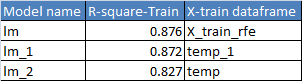

In [101]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     160.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.36e-59
Time:                        20:40:57   Log-Likelihood:                -1334.6
No. Observations:                 143   AIC:                             2683.
Df Residuals:                     136   BIC:                             2704.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.4352    539.018     -0.107      0.915   -1123.376    1008.506
l          -5502.6297   1090.446     -5.046      0.000   -7659.053   -3346.206
three       1.071e+04   3094.849      3.461      0.001    4590.813    1.68e+04
twelve      6261.6183   2908.798      2.153      0.033     509.293     1.2e+04
bmw         9019.5246   1198.396      7.526      0.000    6649.624    1.14e+04
porsche     1.131e+04   1657.313      6.825      0.000    8033.591    1.46e+04
curbweight   3.12e+04   1262.796     24.707      0.000    2.87e+04    3.37e+04
==============================================================================
Omnibus:                       12.427   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               34.330
Skew:                           0.104   Prob(JB):                     3.51e-08
Kurtosis:                       5.391   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     187.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.26e-59
Time:                        20:40:58   Log-Likelihood:                -1337.0
No. Observations:                 143   AIC:                             2686.
Df Residuals:                     137   BIC:                             2704.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -267.7395    537.075     -0.499      0.619   -1329.768     794.289
l          -5753.2986   1098.496     -5.237      0.000   -7925.499   -3581.098
three       1.117e+04   3128.110      3.571      0.000    4986.415    1.74e+04
bmw         8838.4077   1211.189      7.297      0.000    6443.364    1.12e+04
porsche     1.113e+04   1676.994      6.637      0.000    7814.211    1.44e+04
curbweight  3.188e+04   1238.554     25.741      0.000    2.94e+04    3.43e+04
==============================================================================
Omnibus:                       11.098   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               28.535
Skew:                           0.027   Prob(JB):                     6.36e-07
Kurtosis:                       5.188   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     164.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.74e-51
Time:                        20:40:59   Log-Likelihood:                -1358.8
No. Observations:                 143   AIC:                             2728.
Df Residuals:                     138   BIC:                             2742.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7102.1102   1128.124      6.296      0.000    4871.468    9332.753
bmw         7154.8487   1420.457      5.037      0.000    4346.174    9963.523
porsche     7376.6496   1976.096      3.733      0.000    3469.309    1.13e+04
enginesize  3.422e+04   2345.913     14.585      0.000    2.96e+04    3.89e+04
citympg    -8014.4320   1915.154     -4.185      0.000   -1.18e+04   -4227.591
==============================================================================
Omnibus:                       14.375   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.761
Skew:                           0.715   Prob(JB):                     0.000378
Kurtosis:                       3.774   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Analysis for model lm


In [104]:
## predict the values of y using the trained model
y_train_pred_lm=lm.predict(X_train_rfe)

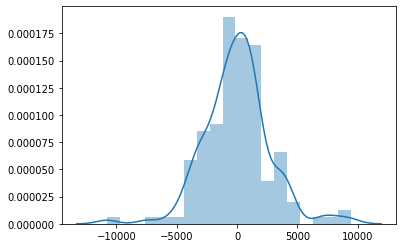

In [105]:
## Calculate the residual and plot the distribution plot
res_lm=y_train-y_train_pred_lm
sns.distplot(res_lm)

## Residual Analysis for model lm_1

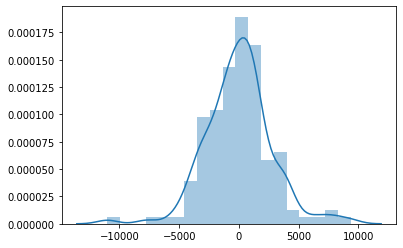

In [106]:
## predict the values of y using the trained model
y_train_pred_lm_1=lm_1.predict(temp_1)
## Calculate the residual and plot the distribution plot
res_lm_1=y_train-y_train_pred_lm_1
sns.distplot(res_lm_1)

## Residual Analysis for model lm_2

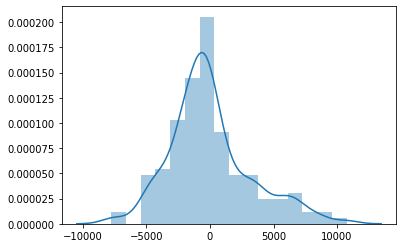

In [107]:
## predict the values of y using the trained model
y_train_pred_lm_2=lm_2.predict(temp)
## Calculate the residual and plot the distribution plot
res_lm_2=y_train-y_train_pred_lm_2
sns.distplot(res_lm_2)

## Prediction and evaluation on test

### Scale the test set

In [108]:
## Scale the test set as well
## Fit on data
df_test[num_var]=scaler.transform(df_test[num_var])
df_test.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,saab,subaru,toyota,volkswagen,volvo,-1,0,1,2,3
car_ID,,,,,,,,,,,,,,,,,,,,,
161,1,1,1,1,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,...,0,0,1,0,0,0,1,0,0,0
187,1,1,1,1,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,...,0,0,0,1,0,0,0,0,1,0
60,1,1,0,1,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,...,0,0,0,0,0,0,0,1,0,0
166,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,...,0,0,1,0,0,0,0,1,0,0
141,1,1,0,1,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,...,0,1,0,0,0,0,0,0,1,0


In [109]:
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,saab,subaru,toyota,volkswagen,volvo,-1,0,1,2,3
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.822581,0.564516,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,...,0.048387,0.016129,0.193548,0.080645,0.080645,0.145161,0.274194,0.177419,0.241935,0.145161
std,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,...,0.216335,0.127000,0.398304,0.274512,0.274512,0.355139,0.449749,0.385142,0.431751,0.355139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Devide into X_test and y_test

In [110]:
y_test=df_test.pop('price')
X_test=df_test

### Add constant variable

In [111]:
## for lm model
X_test_lm = sm.add_constant(X_test)

## for lm_1 model
X_test_lm_1 = sm.add_constant(X_test)

## for lm_2 model
X_test_lm_2 = sm.add_constant(X_test)

### Evaluating the models one by one


### - Model lm

In [112]:
### Creating the X_test_lm having the same column as X_train_rfe
cols=[]
for col in X_train_rfe.columns:
    cols.append(col)

X_test_lm = X_test_lm [cols]
X_test_lm.head()

,const,l,three,twelve,bmw,porsche,curbweight
car_ID,,,,,,,
161,1.0,0,0,0,0,0,0.235066
187,1.0,0,0,0,0,0,0.305275
60,1.0,0,0,0,0,0,0.347944
166,1.0,0,0,0,0,0,0.301396
141,1.0,0,0,0,0,0,0.291699


In [113]:
y_pred_lm = lm.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

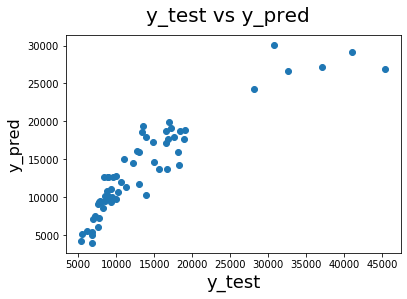

In [114]:
# Plotting y_test and y_pred_lm to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)      

In [115]:
## evaluate the model by comparing R-square
r2_score(y_true=y_test,y_pred=y_pred_lm)

0.785399659983677

### - Model lm_1

In [116]:
### Creating the X_test_lm_1 having the same column as temp_1
cols=[]
for col in temp_1.columns:
    cols.append(col)

X_test_lm_1 = X_test_lm_1 [cols]
X_test_lm_1.head()

,const,l,three,bmw,porsche,curbweight
car_ID,,,,,,
161,1.0,0,0,0,0,0.235066
187,1.0,0,0,0,0,0.305275
60,1.0,0,0,0,0,0.347944
166,1.0,0,0,0,0,0.301396
141,1.0,0,0,0,0,0.291699


In [117]:
y_pred_lm_1 = lm_1.predict(X_test_lm_1)

Text(0, 0.5, 'y_pred')

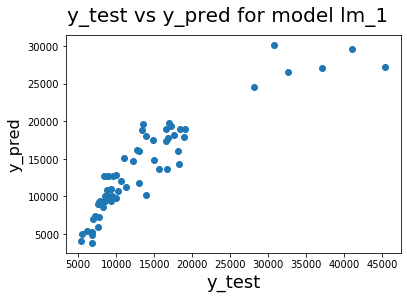

In [118]:
# Plotting y_test and y_pred_lm_1 to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm_1)
fig.suptitle('y_test vs y_pred for model lm_1', fontsize = 20)          
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)      

In [119]:
## evaluate the model by comparing R-square
r2_score(y_true=y_test,y_pred=y_pred_lm_1)

0.7878324574704243

### - Model lm_1

In [120]:
### Creating the X_test_lm_1 having the same column as temp
cols=[]
for col in temp.columns:
    cols.append(col)

X_test_lm_2 = X_test_lm_2 [cols]
X_test_lm_2.head()

,const,bmw,porsche,enginesize,citympg
car_ID,,,,,
161,1.0,0,0,0.139623,0.694444
187,1.0,0,0,0.181132,0.388889
60,1.0,0,0,0.230189,0.361111
166,1.0,0,0,0.139623,0.361111
141,1.0,0,0,0.177358,0.361111


In [121]:
y_pred_lm_2 = lm_2.predict(X_test_lm_2)

Text(0, 0.5, 'y_pred')

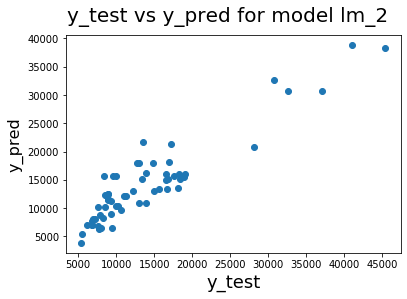

In [122]:
# Plotting y_test and y_pred_lm_2 to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm_2)
fig.suptitle('y_test vs y_pred for model lm_2', fontsize = 20)          
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)      

In [123]:
## evaluate the model by comparing R-square
r2_score(y_true=y_test,y_pred=y_pred_lm_2)

0.8529935212088972

## We can see that model lm_2 is the best model by comparing the R-Square values of train and test set
Model name	R-square-Train	X-train dataframe	R-Square-Pred
lm	0.876	X_train_rfe	0.78
lm_1	0.872	temp_1	0.78
lm_2	0.827	temp	0.85
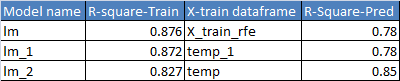

In [124]:
temp.head()

,const,bmw,porsche,enginesize,citympg
car_ID,,,,,
123,1.0,0,0,0.139623,0.500000
126,1.0,0,1,0.339623,0.166667
167,1.0,0,0,0.139623,0.361111
2,1.0,0,0,0.260377,0.222222
200,1.0,0,0,0.260377,0.111111


In [125]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     164.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.74e-51
Time:                        20:42:10   Log-Likelihood:                -1358.8
No. Observations:                 143   AIC:                             2728.
Df Residuals:                     138   BIC:                             2742.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7102.1102   1128.124      6.296      0.000    4871.468    9332.753
bmw         7154.8487   1420.457      5.037      0.000    4346.174    9963.523
porsche     7376.6496   1976.096      3.733      0.000    3469.309    1.13e+04
enginesize  3.422e+04   2345.913     14.585      0.000    2.96e+04    3.89e+04
citympg    -8014.4320   1915.154     -4.185      0.000   -1.18e+04   -4227.591
==============================================================================
Omnibus:                       14.375   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.761
Skew:                           0.715   Prob(JB):                     0.000378
Kurtosis:                       3.774   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## So we can conclude that the predictors having effect on the car price are 
- The car is of make BMW (This will increase the cost, as the cofficient is +ve)
- The car is of make porsche (This will increase the cost, as the cofficient is +ve)
- The eingine size or the car size ( This will also increase the cost as the coffcient is +ve)
- The milage in city (This will decrease the cost as the coffcient is -ve)

## So can say that in USA market, people are more concerned about the brand of the car(can say Brand Loyality) and the size of the car
## As the milage in city is having negative effect of the cost of the car, this may be indicating that for improving the milage, the companies may have compromised with the fearures, weight, engine quality etc. Which is driving the customers away from the cars having higher milage